# Feed-Forward Neural Network with two hidden layers

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

In [132]:
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adadelta,Adam,RMSprop
from keras.utils import np_utils

In [133]:
# shuffle and split the data between a train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [134]:
# Defining hyper parameters
np.random.seed(1337)
nb_classes = 10
batch_size = 128
nb_epochs = 20 
image_size = 784 # 28 x 28

In [135]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [136]:
print("Number of training examples :",X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :",X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1])) 

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [137]:
#Normalization
X_train = X_train/255
X_test = X_test/255

In [138]:
#labelling

print("Class label of first image :", y_train[0])

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ", Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [140]:
#Model Building with two hidden layers

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=nb_classes, activation='softmax'))
model.summary() 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_23 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [142]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epochs, verbose=1, validation_data=(X_test,Y_test)) 

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.6143 - accuracy: 0.4905 - val_loss: 0.8772 - val_accuracy: 0.7716
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6803 - accuracy: 0.8145 - val_loss: 0.5167 - val_accuracy: 0.8592
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4793 - accuracy: 0.8660 - val_loss: 0.4081 - val_accuracy: 0.8863
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4051 - accuracy: 0.8865 - val_loss: 0.3619 - val_accuracy: 0.8980
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3666 - accuracy: 0.8965 - val_loss: 0.3373 - val_accuracy: 0.9018
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.9026 - val_loss: 0.3159 - val_accuracy: 0.9092
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3252 - accuracy: 0.9078 - val_loss: 0.3026 - val_accuracy: 0.9133
Epoch 

In [143]:
#evalute the model

loss, accuracy = model.evaluate(X_test,Y_test,verbose=0) 
print('Model loss: %2f, Accuracy: %2f'%((loss*100),(accuracy*100))) 

Model loss: 22.064705, Accuracy: 93.739998


In [144]:
#Model Prediction
y_train_predclass = model.predict_classes(X_train,batch_size=batch_size)
y_test_predclass = model.predict_classes(X_test,batch_size=batch_size)
print ("\nDeep Neural Network - Train accuracy:"), (round(accuracy_score(y_train,y_train_predclass),3))
print ("\nDeep Neural Network - Train Classification Report")
print ("classification_report(y_train,y_train_predclass)") 
print ("\nDeep Neural Network - Train Confusion Matrix\n")
print (pd.crosstab(y_train,y_train_predclass,rownames = ["Actual"],colnames = ["Predicted"]) ) 


Deep Neural Network - Train accuracy:

Deep Neural Network - Train Classification Report
classification_report(y_train,y_train_predclass)

Deep Neural Network - Train Confusion Matrix

Predicted     0     1     2     3     4     5     6     7     8     9
Actual                                                               
0          5714     0    20    12     9    43    46    10    60     9
1             1  6564    32    29     8    15     3    10    71     9
2            27    65  5427    85    65    22    78    62   117    10
3            11    24    93  5651     3   158    23    51    84    33
4            11    29    25     3  5531     4    62     9    36   132
5            55    27    26   154    38  4909    78    15    79    40
6            32    21    18     2    51    42  5711     0    41     0
7            14    43    58    22    50     5     2  5953    10   108
8            26    91    29    84    20    46    59    13  5435    48
9            34    35     8    62   190    3

In [145]:
print ("\nDeep Neural Network - Testaccuracy:"),(round(accuracy_score(y_test, y_test_predclass),3))
print ("\nDeep Neural Network - Test Classification Report")
print (classification_report(y_test,y_test_predclass))
print ("\nDeep Neural Network - Test Confusion Matrix\n")
print (pd.crosstab(y_test,y_test_predclass,rownames =["Actual"],colnames = ["Predicted"]) )


Deep Neural Network - Testaccuracy:

Deep Neural Network - Test Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.91      0.93      1032
           3       0.92      0.93      0.92      1010
           4       0.92      0.95      0.93       982
           5       0.94      0.90      0.92       892
           6       0.94      0.96      0.95       958
           7       0.94      0.93      0.94      1028
           8       0.90      0.94      0.92       974
           9       0.94      0.89      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000


Deep Neural Network - Test Confusion Matrix

Predicted    0     1    2    3    4    5    6    7    8    9
Actual                                         

In [146]:
model.metrics_names

['loss', 'accuracy']

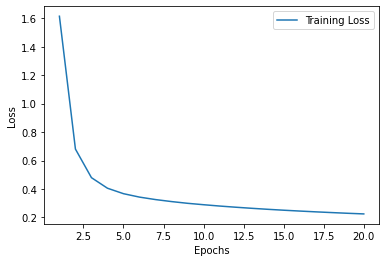

In [147]:
# summarize history for loss

loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

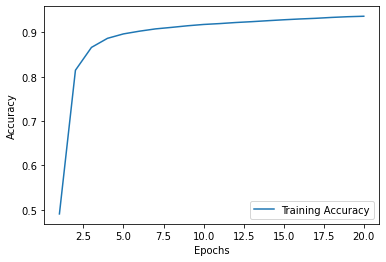

In [148]:
# summarize history for accuracy

accuracy_values = history.history['accuracy']
epochs = range(1, len(accuracy_values)+1)

plt.plot(epochs, accuracy_values, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [149]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [150]:
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label = "Validation Loss")
    ax.plot(x, ty, 'r', label = "Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

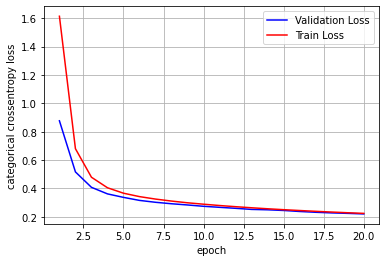

In [151]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel("categorical crossentropy loss")
x=list(range(1, nb_epochs+1))  
vy=history.history['val_loss']
ty=history.history['loss']
plt_dynamic(x, vy, ty, ax) 

# THANK YOU, 


Regards,

CHANDRA MOULI